# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(train['labels'])

# TODO: Number of testing examples.
n_test = len(test['labels'])

# TODO: What's the shape of an traffic sign image?

image_shape = (32,32)

# TODO: How many unique classes/labels there are in the dataset.
s = set()
for i in train['labels']:
    s.add(i)
n_classes = len(s)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
for i in train:
    print(i)

coords
sizes
features
labels


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import numpy as np

def preprocess(data):
    '''
    Data: a list of features, coords, sizes, labels
    Returns: a list of features, resized coords, and labels
    
    '''

    images = data['features'] #Features is a list of 32x32x3 0-255 values
    coords = data['coords'] #Coords is a list of x1,y1,x2,y2
    sizes = data['sizes'] #Sizes is a list of x,y sizes
    labels = data['labels'] #Labels is a list of labels, from 0 to 42

    image_height = len(images)
    image_width = len(images[0])

    coords_resized = []
    for coord,size in zip(coords,sizes):
        x1 = coord[0]*image_width/size[0]
        y1 = coord[1]*image_height/size[1]
        x2 = coord[2]*image_width/size[0]
        y2 = coord[3]*image_height/size[1]
        coords_resized.append([int(i) for i in [x1,y1,x2,y2]])

    assert(len(coords_resized) == len(coords))
    
    
    
    #Shuffle Data
    images, coords_resized, labels = shuffle(images, coords_resized, labels)
    
    return {'features': images, 'coords': coords_resized, 'labels': labels}

train_processed = preprocess(train)
print('processed train')
test_processed = preprocess(test)
print('processed test')

processed train
processed test


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_


**Answer:** 
I decided to start with just the basics to see where how the classifier did. I resized the corrdinates to be in lline with the resized 32x32 image (though I didn't end up using those resized coordinated) and shuffled the data around.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#Testing set already given. Turn CV into 20% of training
split_index = int(len(train_processed['features'])*.8)
X_train = train_processed['features'][:split_index]
X_validation = train_processed['features'][split_index:]
X_test = test_processed['features']

y_train = train_processed['labels'][:split_index]
y_validation = train_processed['labels'][split_index:]
y_test = test_processed['labels']


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** 

To set up the training, validation, and test data, I calculated what cutoff index would be for 80% of the data, and turned the first 80% into my training data and turned the second 20% innto my cross-validation data.

I didn't generate any additional data, as it wasn't necessary in order to get a good classifier.


In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

#Use LeNet adjusted to colors.
def LeNet(x):    
    mu = 0
    sigma = 0.1
    
    weights = {
        'conv1': tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma, name='conv1weights')),
        'conv2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma, name='conv2weights')),
        'fc1': tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma, name='fc1weights')),
        'fc2': tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma, name='fc2weights')),
        'logits': tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma, name='logitsweights'))
    }
    
    biases = {
        'conv1': tf.Variable(tf.zeros(6)),
        'conv2': tf.Variable(tf.zeros(16)),
        'fc1': tf.Variable(tf.zeros(120)),
        'fc2': tf.Variable(tf.zeros(84)),
        'logits': tf.Variable(tf.zeros(43))
    }
    
    # Input: 32x32x3, output: 28x28x6
    conv1   = tf.nn.bias_add(tf.nn.conv2d(x, weights['conv1'], strides=[1, 1, 1, 1], padding='VALID'),biases['conv1'])

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Input = 14x14x6, Output = 10x10x16.
    conv2 = tf.nn.bias_add(tf.nn.conv2d(conv1, weights['conv2'], strides=[1, 1, 1, 1], padding='VALID'), biases['conv2'])
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1   = tf.nn.bias_add(tf.matmul(fc0, weights['fc1']), biases['fc1'])
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2    = tf.nn.bias_add(tf.matmul(fc1, weights['fc2']), biases['fc2'])
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.nn.bias_add(tf.matmul(fc2, weights['logits']),biases['logits'])
    
    return logits



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I used basically the same model as the previous LeNet exercise, with a few layer sizes changed.

Layer 1 is a convolution. Input is 32x32x3, with strides [1,1,1,1], weights of shape (5, 5, 3, 6) and valid padding to get a size of 28x28x6. It's also got biases added to it and is activated with a relu. It's then pooled with a kernel size of [1,2,2,1] and strides of [1,2,2,1], with valid padding again, for a size of 14x14x6.

Layer 2 is also a convolution. It has strides of 2 in each the x and y direction, with valid padding and weights of shape (5,5,6,16), to get an output size of 10x10x16, with biases then added to it. It is the activated with relu and pooled with a kernel size of 2 in each the x and y direction and strides of 2 in each the x and y direction, with valid pooling, do get a size of 5x5x16.

Layer 3 is fully connected, starting with flattening the previous later for a size of 1x400, with a matrix multiplication with weights of size 400x120, for a new size of 1x120, which is then activated with a relu function

Layer 4 is also fully connected. It does a matrix multiplication with weights of size 120x84 to get a new size of 1x84. It, too, is then activated with a relu function.

Layer 5 is just a matrix multiplication of the output of layer 4 with weights of size 84x43, which then bas biases added to it doe s total size of 1x43 (for our 43 labels)

In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.

#The following is taken from the previous exercise.
#As the two are similar, there is no need to change it.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = .001
EPOCHS = 10
BATCH_SIZE = 256

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.360

EPOCH 2 ...
Validation Accuracy = 0.699

EPOCH 3 ...
Validation Accuracy = 0.821

EPOCH 4 ...
Validation Accuracy = 0.877

EPOCH 5 ...
Validation Accuracy = 0.899

EPOCH 6 ...
Validation Accuracy = 0.910

EPOCH 7 ...
Validation Accuracy = 0.923

EPOCH 8 ...
Validation Accuracy = 0.937

EPOCH 9 ...
Validation Accuracy = 0.939

EPOCH 10 ...
Validation Accuracy = 0.942

Model saved


In [8]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.853


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used an Adam optimizer, because the video said it was slightly more complicated and might give better results than a gradient descent optimizer.

Batch size was the default 128, and I found this to be the ideal batch size as well.

I went through 10 epochs. Some of the time, it gets to a validation accuracy of ~94% by 5 epochs, sometimes it needs more than 10. 10 was a good halfway point.

I found a learning rate of .001 to be perfect for learning. It was just enough that the accuracy was topping out, but if I moved the learning rate higher it would no longer top out.

The only other hyperparameters were mu = 0 and sigma = 0.1 to decide on the normal distribution. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I just took the existing LeNet network and modified it slightly to fit this network. I was expecting it to not do very well, and figured I would have to add more layers, but after testing it, it ended up doing very well. The only thing I changed was the learning rate, and it ended up hovering around 94% cross-validation accuracy.

This problem and the last are very similar, the biggest difference being that this one is in color where the last one was greyscale. That's why it seemed to obvious to use LeNet as my algorithm.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

.DS_Store
054.png
53111965-warning-u-turn-traffic-sign-traffic-signs-in-bangkok-city--thailand.png
diamond-shaped-traffic-sign-mean_fdeb8469001b3630.png
Do-Not-Enter-Sign-X-R5-1.png
sign-giving-order-manually-stop.png


/Users/jaredjensen/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


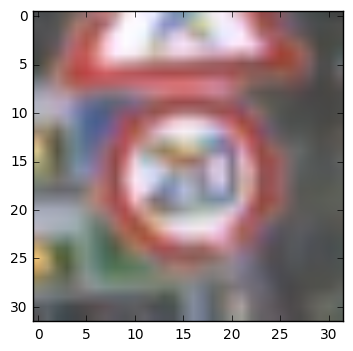

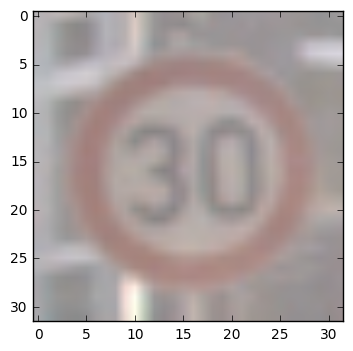

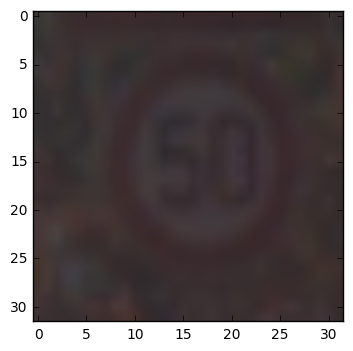

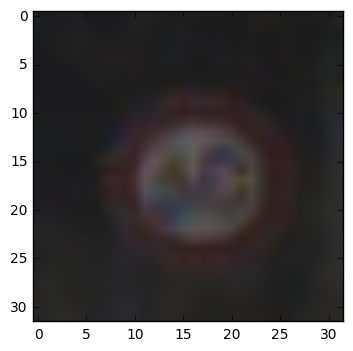

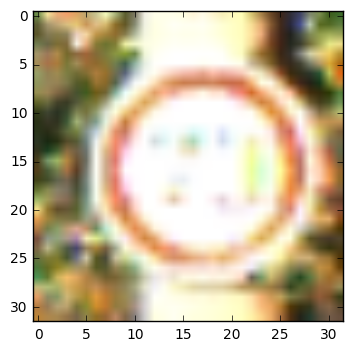

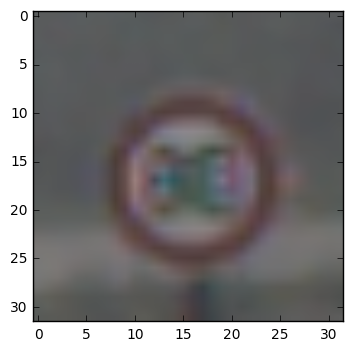

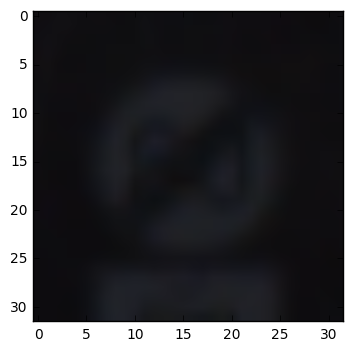

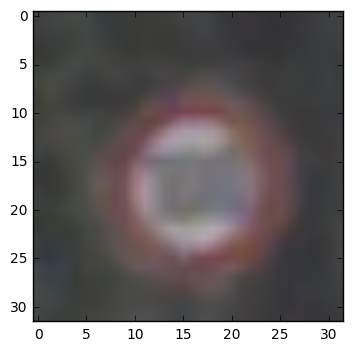

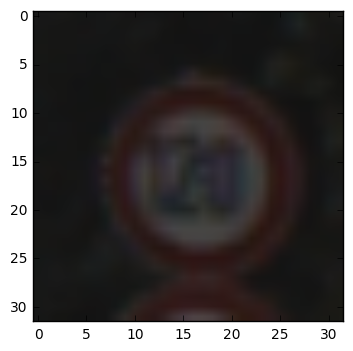

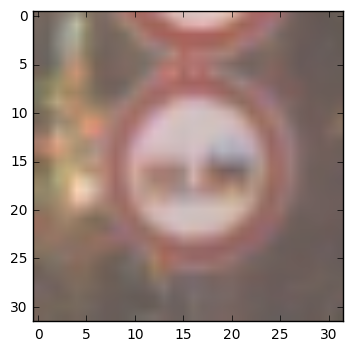

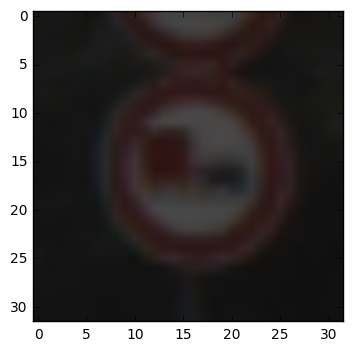

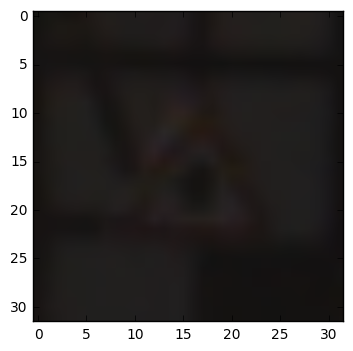

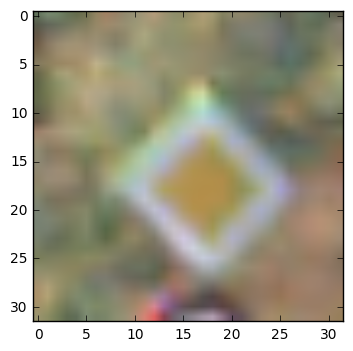

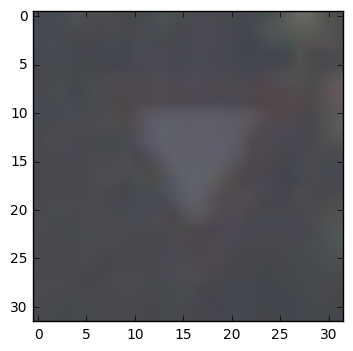

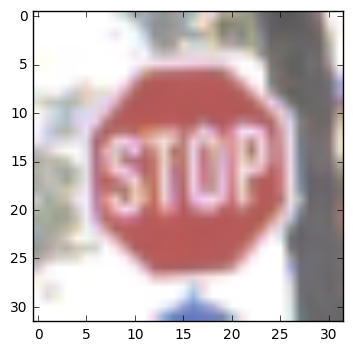

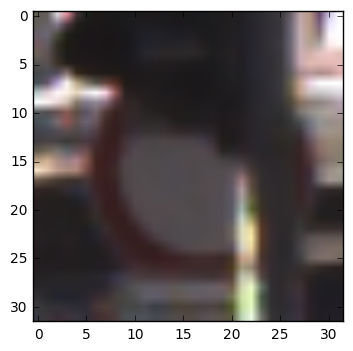

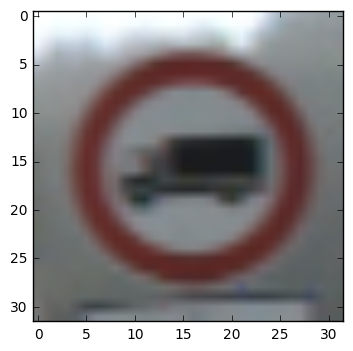

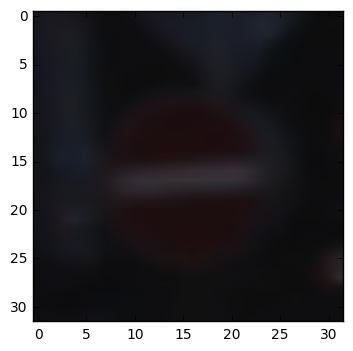

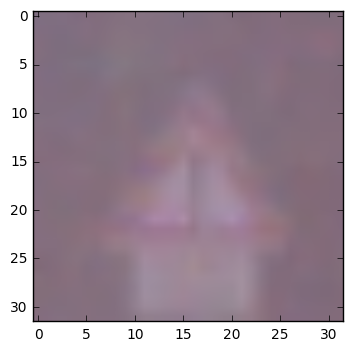

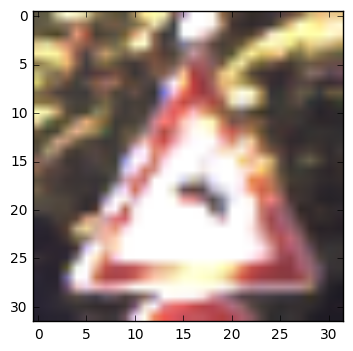

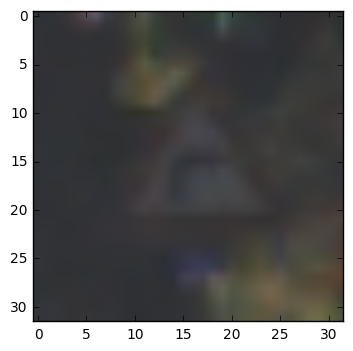

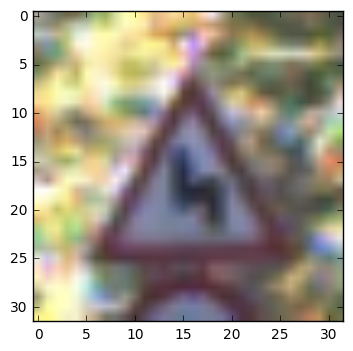

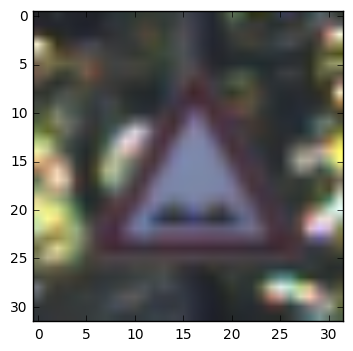

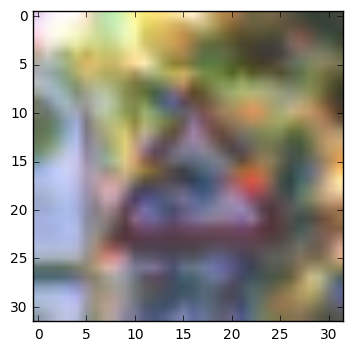

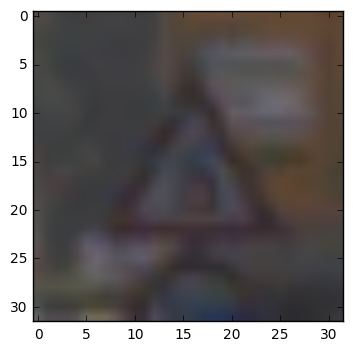

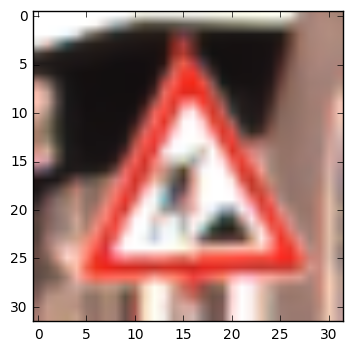

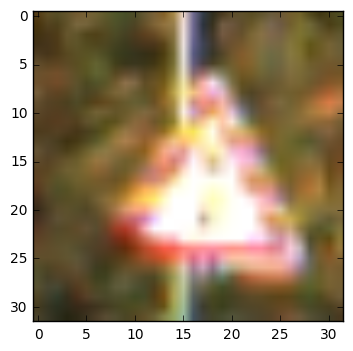

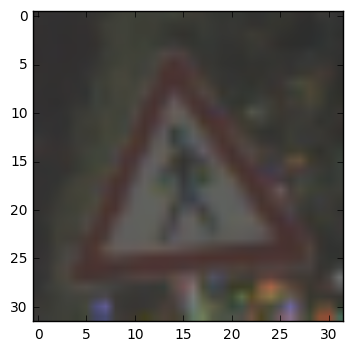

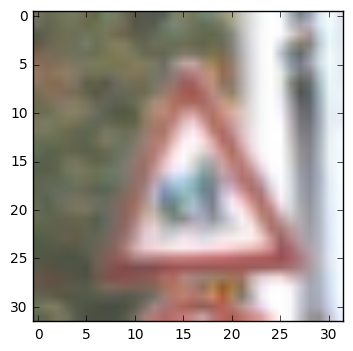

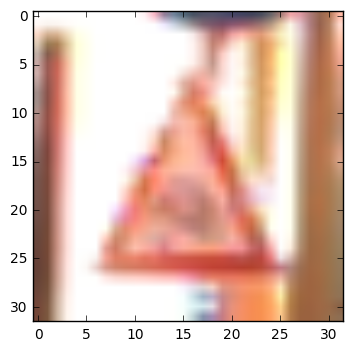

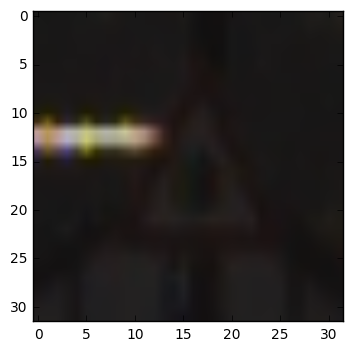

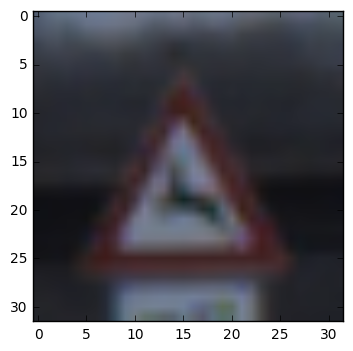

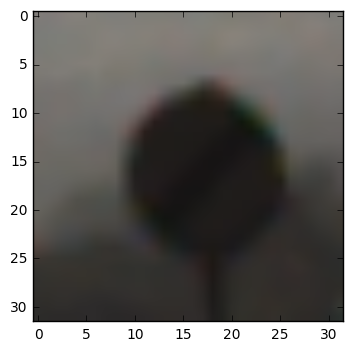

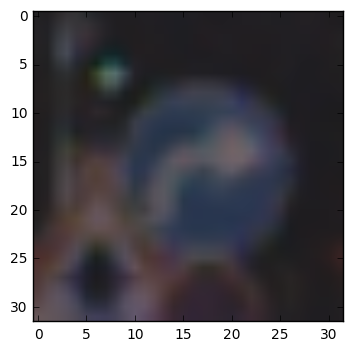

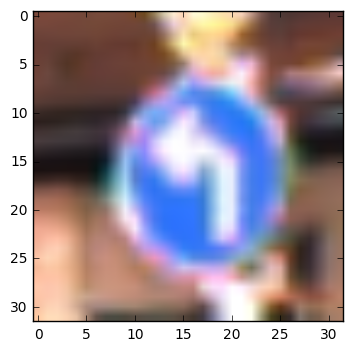

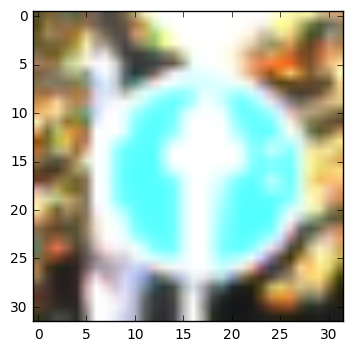

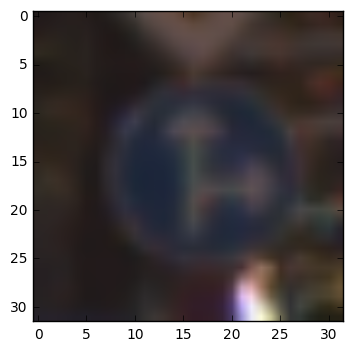

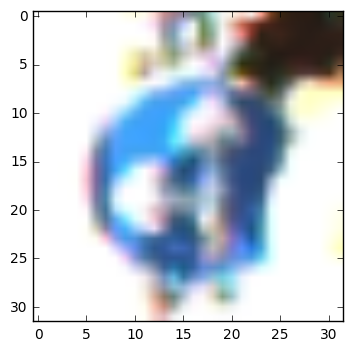

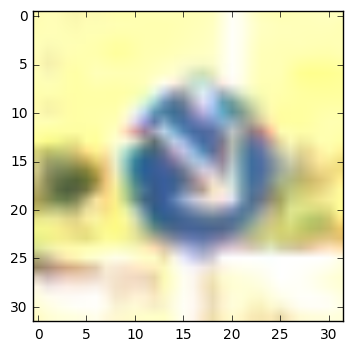

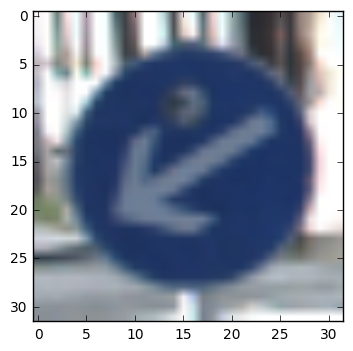

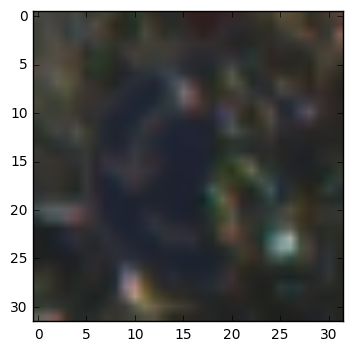

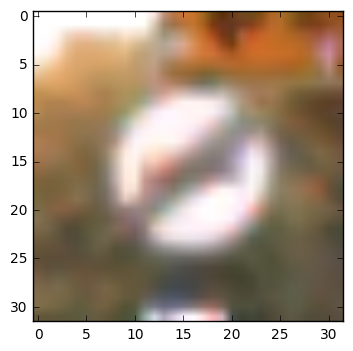

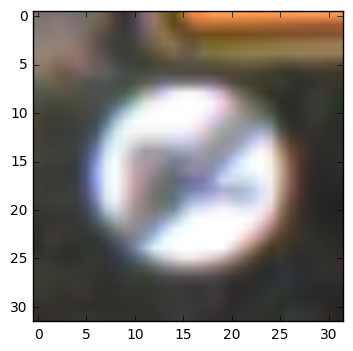

In [10]:
import matplotlib.image as mpimg
import os
import csv

images = np.array([mpimg.imread("traffic-signs-test/" + image_name) for image_name in os.listdir("traffic-signs-test/") if image_name.endswith('.png')])
for image_name in os.listdir("traffic-signs-test/"):
    print(image_name)

#Example images:
with open('signnames.csv') as csvfile:
        csv.reader(csvfile)
        signnames = [x[1] for x in csv.reader(csvfile)]
        
labels_seen = set()
for (image, label) in zip(train['features'], train['labels']):
    if label not in labels_seen:
        plt.imshow(image)
        labels_seen.add(label)
        plt.figure()
        mpimg.imsave(str(label)+'.jpg', image)
    


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I tried to give it hard answers, since it should be able to do easy signs without much difficulty. The first one is 'Roundabout Mandatory', but it's in the wrong color. 

The second one, a 'U-turn only' sign, isn't on the training list. I wanted to see what the algorithm would come up with for that one.

The third one is a 'Dangerous curve to the left', but in a different color from the training set.

The fourth one is 'Do Not Enter'. Again, not in the training set, so I wanted to see what the algorithm would come up with.

The fifth one is a stop sign. I was sure that the algorithm would get this one.

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    X_data = tf.placeholder(tf.float32, (None, 32, 32, 3))
    
    result_indices = sess.run(tf.argmax(logits, 1), feed_dict = {x: images})
    for result in result_indices:
        print(signnames[result])
    

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Not even close. The algorithm  changes its guesses every time I re-train, and rarely gets the right answer. I'm usually getting a 0% accuracy on my 5 signs, despite getting 85% on the test set.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    top10s = sess.run(tf.nn.top_k(logits, 10), feed_dict = {x: images})
    sm = sess.run(tf.nn.softmax(top10s[0]))
    for i in range(len(top10s[1])):
        print("Picture {}  ".format(i))
        for guess_num in range(len(top10s[1][i])):
            print("   {}: {}  ".format(guess_num, signnames[top10s[1][i][guess_num]]))
            print("   Probability: {}  ".format(sm[i][guess_num]))
        

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The algorithm is pretty sure all of them are speed limit signs. In fact, the predictions look pretty similar for each of them, with the 'Speed Limit' signs being the most probably signs. I currently have no hypotheses as to why this might be.

Top results for each image:

Picture 0  
   0: Speed limit (100km/h)  
   Probability: 0.20009787380695343  
   1: Speed limit (70km/h)  
   Probability: 0.11793718487024307  
   2: No passing  
   Probability: 0.10528802871704102  
   3: Speed limit (60km/h)  
   Probability: 0.0852053314447403  
   4: Go straight or left  
   Probability: 0.08486879616975784  
   5: Speed limit (120km/h)  
   Probability: 0.084811270236969  
   6: Stop  
   Probability: 0.08317390084266663  
   7: End of speed limit (80km/h)  
   Probability: 0.0798746719956398  
   8: Road work  
   Probability: 0.07949851453304291  
   9: Speed limit (50km/h)  
   Probability: 0.07924441993236542  
Picture 1  
   0: Speed limit (100km/h)  
   Probability: 0.16659845411777496  
   1: Speed limit (70km/h)  
   Probability: 0.11270616948604584  
   2: No passing  
   Probability: 0.11156419664621353  
   3: Go straight or left  
   Probability: 0.09577383100986481  
   4: End of speed limit (80km/h)  
   Probability: 0.09245976060628891  
   5: Priority road  
   Probability: 0.09239540994167328  
   6: Bicycles crossing  
   Probability: 0.08845176547765732  
   7: Speed limit (120km/h)  
   Probability: 0.08132914453744888  
   8: Road work  
   Probability: 0.08062521368265152  
   9: Keep left  
   Probability: 0.07809615880250931  
Picture 2  
   0: Speed limit (100km/h)  
   Probability: 0.15145663917064667  
   1: No passing  
   Probability: 0.12338994443416595  
   2: Speed limit (70km/h)  
   Probability: 0.11916846036911011  
   3: Go straight or left  
   Probability: 0.10559795051813126  
   4: Speed limit (120km/h)  
   Probability: 0.09232304245233536  
   5: Road work  
   Probability: 0.08755039423704147  
   6: Priority road  
   Probability: 0.08650057017803192  
   7: Keep left  
   Probability: 0.0828593522310257  
   8: End of no passing  
   Probability: 0.0758606567978859  
   9: Bicycles crossing  
   Probability: 0.07529306411743164  
Picture 3  
   0: Speed limit (100km/h)  
   Probability: 0.14872805774211884  
   1: No passing  
   Probability: 0.12420287728309631  
   2: Go straight or left  
   Probability: 0.11186985671520233  
   3: Speed limit (70km/h)  
   Probability: 0.10612185299396515  
   4: Bicycles crossing  
   Probability: 0.0905449390411377  
   5: Speed limit (50km/h)  
   Probability: 0.08859150856733322  
   6: Speed limit (120km/h)  
   Probability: 0.08386396616697311  
   7: End of no passing  
   Probability: 0.08371561765670776  
   8: Priority road  
   Probability: 0.08301098644733429  
   9: End of speed limit (80km/h)  
   Probability: 0.07935027778148651  
Picture 4  
   0: Speed limit (100km/h)  
   Probability: 0.1483994573354721  
   1: No passing  
   Probability: 0.13299386203289032  
   2: Speed limit (70km/h)  
   Probability: 0.11315271258354187  
   3: Go straight or left  
   Probability: 0.09645962715148926  
   4: Speed limit (120km/h)  
   Probability: 0.09206373244524002  
   5: End of speed limit (80km/h)  
   Probability: 0.08531250804662704  
   6: Road work  
   Probability: 0.08477180451154709  
   7: Bicycles crossing  
   Probability: 0.084084153175354  
   8: Speed limit (50km/h)  
   Probability: 0.08247468620538712  
   9: Road narrows on the right  
   Probability: 0.08028749376535416  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.